1.	Create database – restaurant, create collection – rescollection Insert the documents into collections.

In [ ]:
from pymongo import MongoClient
import json

if __name__ == "__main__":
    client = MongoClient("mongodb://localhost:27017")
    # First Create Database
    db = client['restaurant']
    # Collection
    collection = db['rescollection']
    # Loading or Opening the json file
    with open('D:/pymongo/restaurants-dataset.json',"r", encoding='utf-8') as file:
        response = file.read()
        response = response.replace('\n', '')
        response = response.replace('}{', '},{')
        response = "[" + response + "]"
        file_data = json.loads(response)
     
    if isinstance(file_data, list):
        collection.insert_many(file_data) 
    else:
        collection.insert_one(file_data)


2.Display all the documents in the collection restaurants.

In [ ]:
db.rescollection.find().pretty()

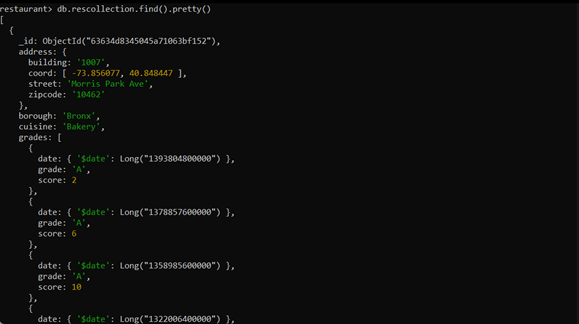

3 Display the fields restaurant_id, name, borough, and zip code, but exclude the field _id for all the documents in the collection restaurant.


In [ ]:
db.rescollection.find({},{restaurant_id : 1,name : 1,borough : 1,'address.zipcode' : 1,_id : 0})

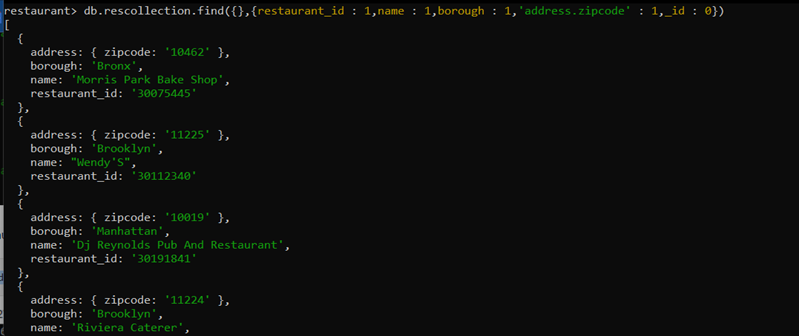

In [ ]:

4 Find the restaurants who achieved a score more than 90.

db.rescollection.find({'grades.score' : {$gt : 90}},{name : 1,_id:0})


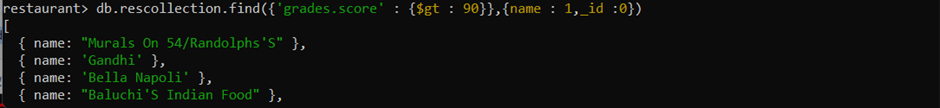

In [ ]:
5 Show the restaurants that achieved a score, more than 80 but less than 100.

db.rescollection.find({'grades.score' : {$gt : 80,$lt : 100}},{name : 1})


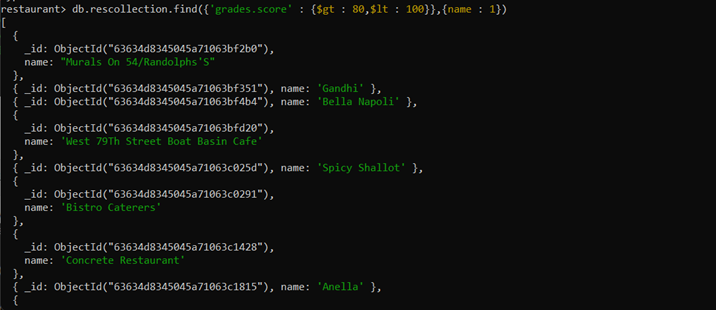

In [ ]:
6 Write Query to show the restaurants that do not prepare any cuisine of american & their grade score > 70.

db.rescollection.find({$and:[{"cuisine" : {$ne :"American "}},{"grades.score" : {$gt : 70}}]})


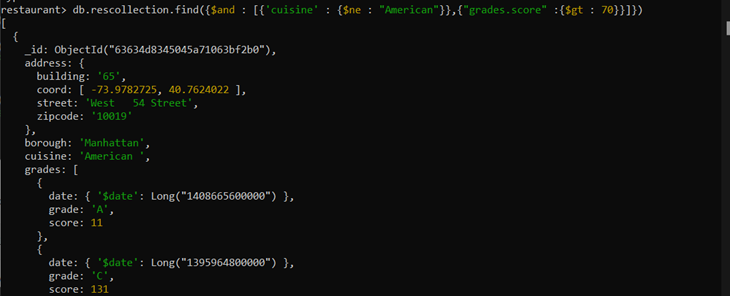

In [ ]:
7 Write a MongoDB query to arrange the name of the cuisine in an ascending order and for that same borough arranged in descending order.
db.rescollection.find().sort({cuisine : 1,borough : -1})

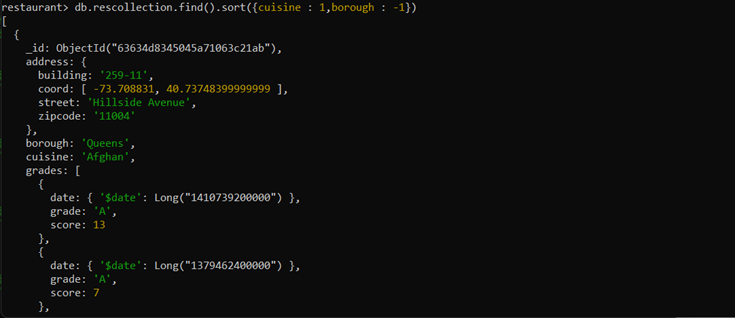

In [ ]:
8 Write a MongoDB query to arrange the name of the cuisine in descending order.

db.rescollection.find().sort({cuisine:-1})

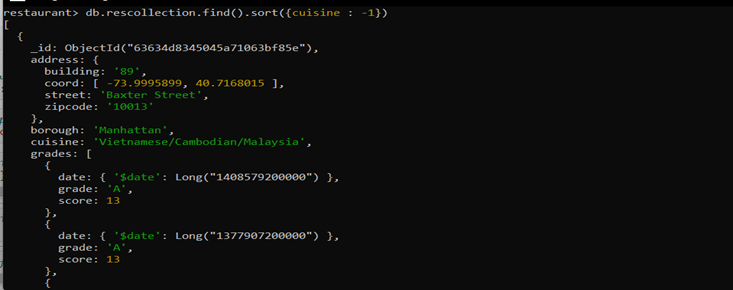

In [ ]:
9 Show the restaurant Id, name, borough and cuisines for those restaurants which prepared dish except 'American' and 'Chinese' or restaurant's name begins with letter 'Bil'.

db.rescollection.find({$or:[{name: /^Bil/},{$and: [{cuisine: {$ne :"American "}},{cuisine : {$ne :"Chinese"}}]}]},{restaurant_id : 1,name:1,borough:1,cuisine:1})


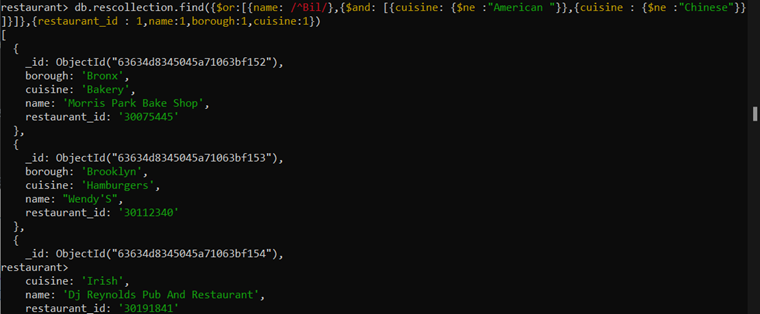

In [ ]:
10 Show the restaurant Id, name, borough and cuisines and score for restaurant's name begins with letter 'Bil'.

db.rescollection.find({"name" : { $regex : /^Bil.*/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})


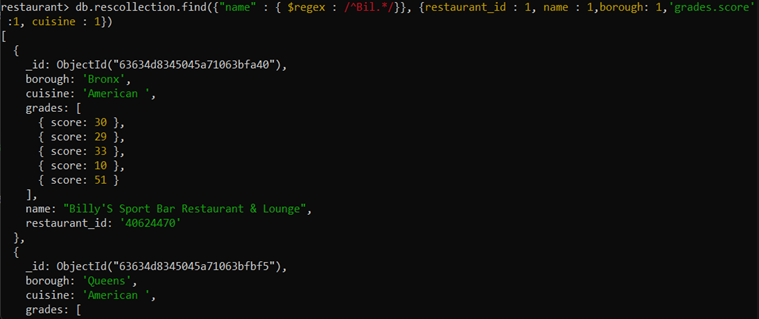

In [ ]:
11 Show the restaurant Id, name, borough and cuisines and score for restaurant serving “Indian” as cuisines. 

db.rescollection.find({cuisine:'Indian'},{restaurant_id:1,name:1,borough:1,cuisine:1,_id:0,'grades.score':1})


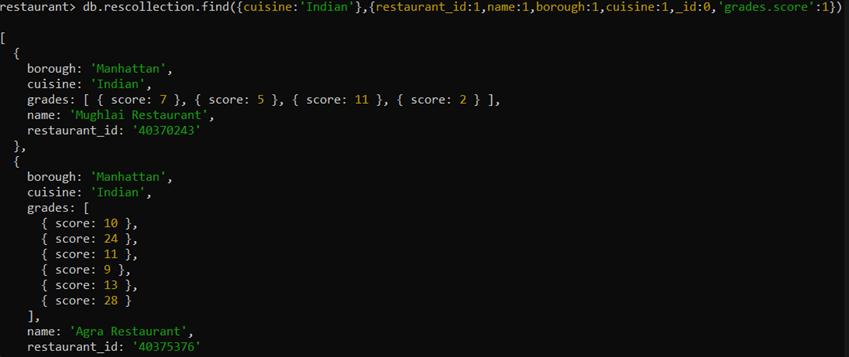

In [ ]:
12 Write a MongoDB query to find the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'bi' as last three letters for its name

db.rescollection.find({"name" : { $regex : /.*bi$/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})


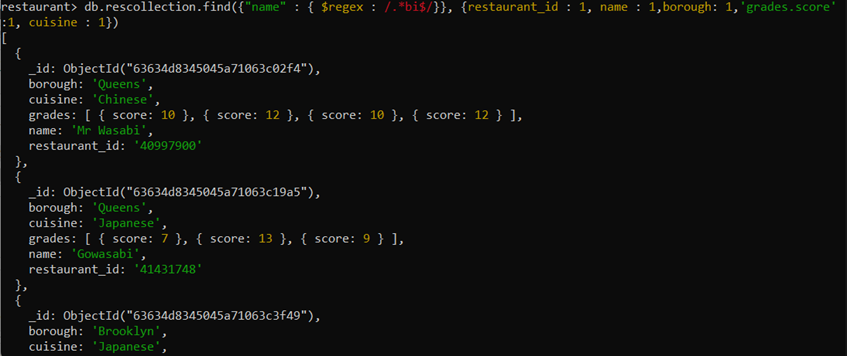

In [ ]:
13 Write a MongoDB query to find the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'il' as last three letters for its name.

db.rescollection.find({"name" : { $regex : /.*il$/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})


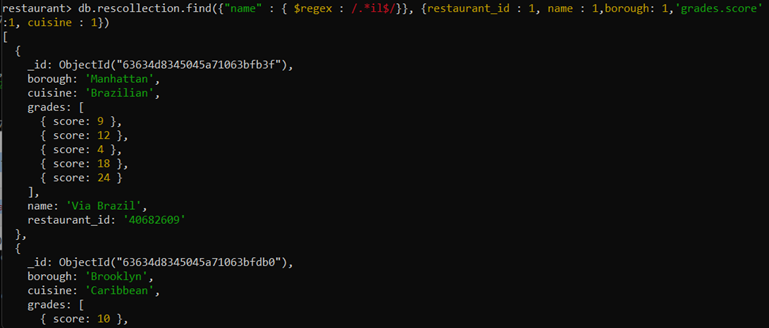

In [ ]:
14 Write a query to show all the restaurant Id, name, borough, cuisines, and score for those restaurants which contain 'il' anywhere in its name.

db.rescollection.find({"name" : { $regex : /.*il.*/}}, {restaurant_id : 1, name : 1,borough: 1,'grades.score' :1, cuisine : 1})


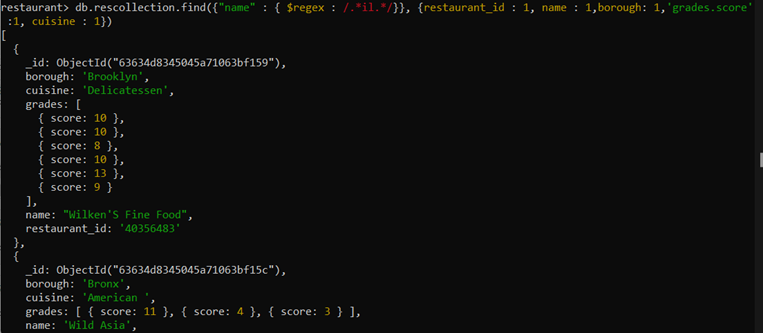

In [ ]:
15 Write a MongoDB query which will select the restaurant Id, name and grades for those restaurants which returns 0 as a remainder after dividing the score by 7.

db.rescollection.find({"grades.score":{$mod : [7,0]}},{restaurant_id: 1,name:1,grades:1,_id:0})


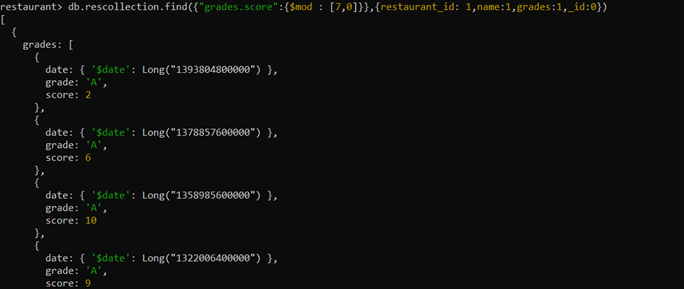

In [ ]:
16 Show document/record counts that has street and not street in addresses.
db.rescollection.find({"address.street":{ $exists : true }})

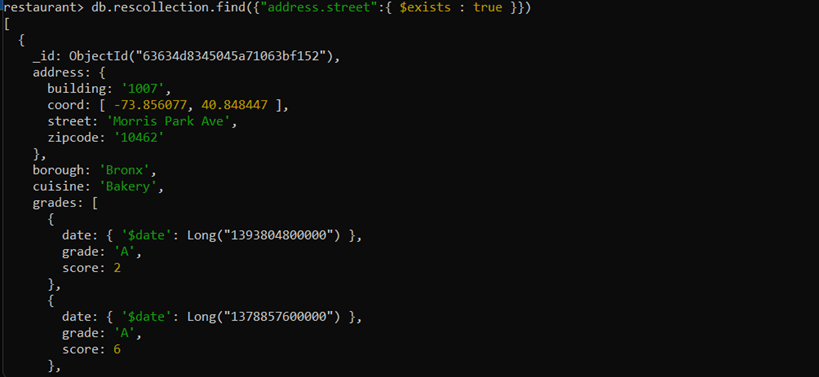

In [ ]:
17 Write a MongoDB query to find the restaurants which do not prepare any cuisine of 'American' and achieved a score more than 70 and located in the longitude less than -65.754168

db.rescollection.find({$and:[{cuisine:{$ne:'American'}},{"grades.score":{'$gt':70}},{"address.coord" :
 {$lt: -65.754168}}]},{'_id':0,'name':1,'restaurant_id':1,'borough':1,'cuisine':1,'grades.score':1})


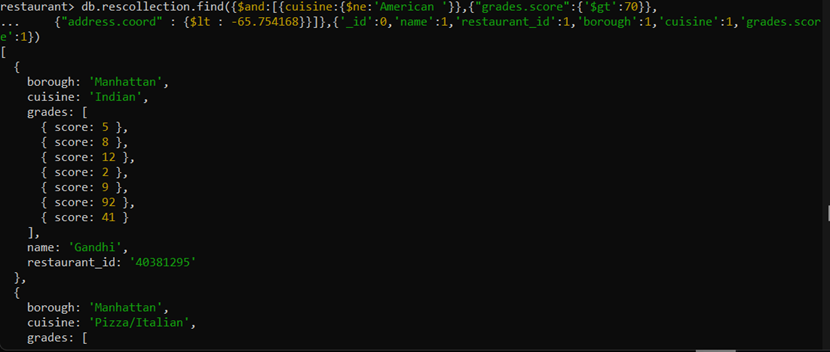